**Handwritten Digit Recognizer 0-9**

using MNIST dataset

#Dataset

In [1]:
import keras
from keras.datasets import mnist
data=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [2]:
#mnist data format
(X_train,y_train),(X_test,y_test)=data

In [3]:
#understanding the data
print('X_train shape :',X_train.shape)
print('y_train shape :',y_train.shape)
print('X_test shape :',X_test.shape)
print('y_test shape :',y_test.shape)

X_train shape : (60000, 28, 28)
y_train shape : (60000,)
X_test shape : (10000, 28, 28)
y_test shape : (10000,)


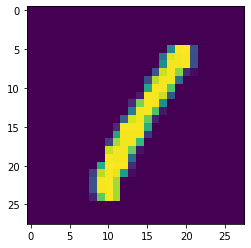

In [4]:
#visualize some images
import matplotlib.pyplot as plt
plt.imshow(X_train[3])

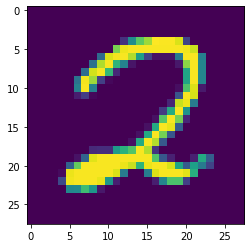

In [5]:
plt.imshow(X_test[35])

In [6]:
#reshape,normalize
X_train=X_train.reshape(-1,28,28,1)
X_test=X_test.reshape(-1,28,28,1)
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train/=255    #normalize
X_test/=255
from keras.utils import np_utils
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)

In [7]:
#now shapes
print('X_train shape :',X_train.shape)
print('y_train shape :',y_train.shape)
print('X_test shape :',X_test.shape)
print('y_test shape :',y_test.shape)

X_train shape : (60000, 28, 28, 1)
y_train shape : (60000, 10)
X_test shape : (10000, 28, 28, 1)
y_test shape : (10000, 10)


#Model

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense

In [9]:
model=Sequential()
model.add(Conv2D(20,(2,2),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [10]:
#total no.parameters
model.count_params()

34020

In [11]:
#fiiting
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.7300 - accuracy: 0.7687
Epoch 2/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1724 - accuracy: 0.9508
Epoch 3/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1148 - accuracy: 0.9679
Epoch 4/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0877 - accuracy: 0.9738
Epoch 5/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0732 - accuracy: 0.9786
Epoch 6/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0645 - accuracy: 0.9804
Epoch 7/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0568 - accuracy: 0.9832
Epoch 8/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0547 - accuracy: 0.9835
Epoch 9/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0506 - accuracy: 0.9845
Epoch 10/10
1875/1875 [==============================] - 20s 11m

In [13]:
accuracy=history.history['accuracy']
loss=history.history['loss']

{'accuracy': [0.8768666386604309,
  0.9549166560173035,
  0.9687666893005371,
  0.9739333391189575,
  0.977233350276947,
  0.9798333048820496,
  0.9816333055496216,
  0.9830333590507507,
  0.9843000173568726,
  0.985966682434082],
 'loss': [0.4089541435241699,
  0.15913575887680054,
  0.10909765958786011,
  0.08716731518507004,
  0.0758814886212349,
  0.06622316688299179,
  0.05970729514956474,
  0.05553773418068886,
  0.05181519687175751,
  0.04737866297364235]}

In [16]:
accuracy=history.history['accuracy']
loss=history.history['loss']

Text(0.5, 1.0, 'Accuracy and loss over epochs')

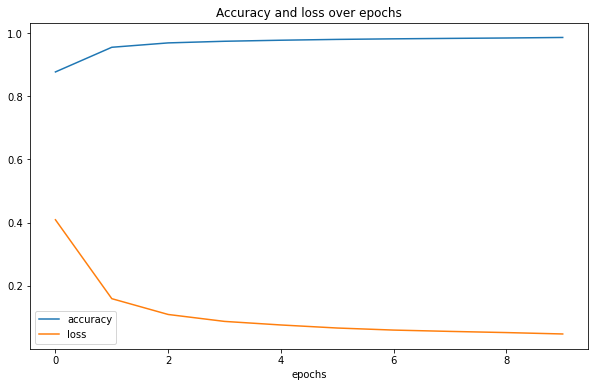

In [23]:
#graph of accuracy,loss over the epochs
plt.figure(figsize=(10,6))
plt.plot(accuracy)
plt.plot(loss)
plt.legend(['accuracy','loss'])
plt.xlabel('epochs')
plt.title('Accuracy and loss over epochs')

In [15]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0803 - accuracy: 0.9766


[0.08033958077430725, 0.9765999913215637]

In [24]:
model.save('mnist.h5')

In [ ]:
#cool....our model is getting 97.6% accuracy on test set